---
title: "Joint Probability"
toc: true
---

In [35]:
import pandas as pd
import warnings 
warnings.filterwarnings("ignore")

data = pd.read_csv("../data/Shark Tank US dataset.csv")

data = data[data.columns[:30]]
data['Got Deal'] = data['Got Deal'].astype(bool)
data.head(2)

,Season Number,Startup Name,Episode Number,Pitch Number,Season Start,Season End,Original Air Date,Industry,Business Description,Company Website,...,Got Deal,Total Deal Amount,Total Deal Equity,Deal Valuation,Number of Sharks in Deal,Investment Amount Per Shark,Equity Per Shark,Royalty Deal,Advisory Shares Equity,Loan
0,1,AvaTheElephant,1,1,9-Aug-09,5-Feb-10,9-Aug-09,Health/Wellness,Ava The Elephant - Baby and Child Care,http://www.avatheelephant.com/,...,True,50000.0,55.0,90909.0,1.0,50000.0,55.0,NaN,NaN,NaN
1,1,MrTod'sPieFactory,1,2,9-Aug-09,5-Feb-10,9-Aug-09,Food and Beverage,Mr. Tod's Pie Factory - Specialty Food,http://whybake.com/,...,True,460000.0,50.0,920000.0,2.0,230000.0,25.0,NaN,NaN,NaN


## Joint Frequency

The joint frequency of two events is the number of times they both occur in a given number of trials. 

In pandas, we can calculate the joint frequency of two events by using the `crosstab` function. 


In [19]:
pd.crosstab(data['Industry'], data['Got Deal'])

Got Deal,False,True
Industry,,
Automotive,4,13
Business Services,21,19
Children/Education,45,78
Electronics,9,7
Fashion/Beauty,98,128
Fitness/Sports/Outdoors,48,79
Food and Beverage,116,180
Green/CleanTech,5,6
Health/Wellness,27,40


## Joint Probability $P(A, B)$

Joint probability is the probability of two events occurring together.The joint probability is usually denoted by $P(A, B)$, which is shorthand for $P(A \wedge B)$ read as _Probability of $A$ AND $B$._

Note that $P(A, B) = P(B, A)$ since $A \wedge B = B \wedge A$.

For example, if we are rolling two dice, the joint probability is the probability of rolling a 1 on the first die and a 2 on the second die. 

In Data Science, we rarely know the true joint probability. Instead, we estimate the joint probability from data. We will talk more about this when we talk about Statistics. 


In [21]:
joint_prob = pd.crosstab(data['Industry'], data['Got Deal'], normalize=True)

joint_prob

Got Deal,False,True
Industry,,
Automotive,0.002930,0.009524
Business Services,0.015385,0.013919
Children/Education,0.032967,0.057143
Electronics,0.006593,0.005128
Fashion/Beauty,0.071795,0.093773
Fitness/Sports/Outdoors,0.035165,0.057875
Food and Beverage,0.084982,0.131868
Green/CleanTech,0.003663,0.004396
Health/Wellness,0.019780,0.029304


In [23]:
sum(joint_prob)

1

Note that sum of joint probabilities is 1 i.e. $\sum P(C, D) = 1$ at the end of the day, since the sum of all probabilities is 1. 

The following three are all true at the same time: 

1. $\sum_{C, D} P(C, D) = 1$ where $P(C, D)$ is a probability table with 12 rows and 3 columns: $C, D, P(C, D)$.


2. $\sum_{C} P(C) = 1$ where $P(C)$ is a probability table with 2 rows (${H, T}$) and 2 columns: $C, P(C)$.


3. $\sum_{D} P(D) = 1$ where $P(D)$ is a probability table with 6 rows (${1, 2, 3, 4, 5, 6}$) and 2 columns: $D, P(D)$.


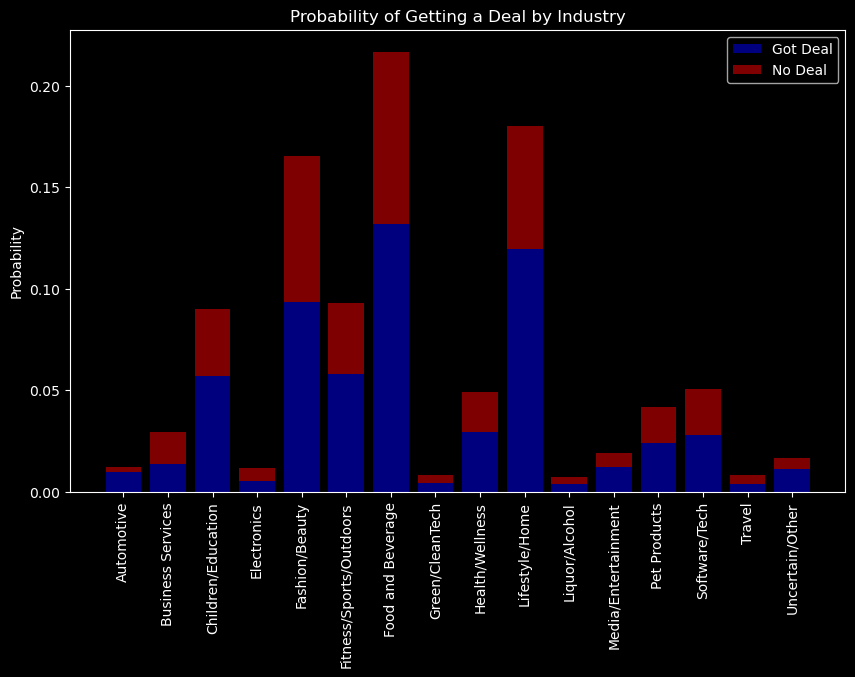

In [36]:
from matplotlib import pyplot as plt

plt.style.use('dark_background')

fig, ax = plt.subplots(figsize=(10, 6))

ax.bar(joint_prob.index, joint_prob[True], label='Got Deal', color='blue', alpha=0.5)
ax.bar(joint_prob.index, joint_prob[False], bottom=joint_prob[True], label='No Deal', color='red', alpha=0.5)

ax.set_xticklabels(joint_prob.index, rotation=90)
ax.set_ylabel('Probability')
ax.set_title('Probability of Getting a Deal by Industry')
ax.legend();

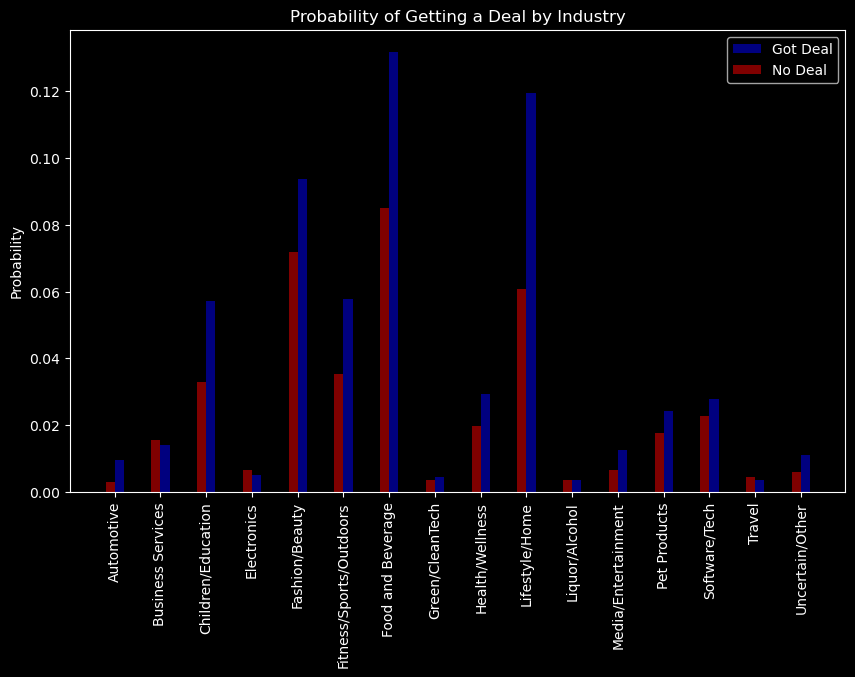

In [66]:


plt.style.use('dark_background')

fig, ax = plt.subplots(figsize=(10, 6))

x_values  = pd.Series(range(len(joint_prob.index)))
x_values1 = x_values + 0.1
x_values2 = x_values - 0.1

ax.bar(x_values1, joint_prob[True],  label='Got Deal', color='blue', alpha=0.5, width=0.2)
ax.bar(x_values2, joint_prob[False], label='No Deal', color='red', alpha=0.5, width=0.2)

ax.set_xticks(x_values)
ax.set_xticklabels(joint_prob.index, rotation=90)

ax.set_ylabel('Probability')
ax.set_title('Probability of Getting a Deal by Industry')
ax.legend();



## Marginal Probability $P(A)$

Because most data sets are multi-dimensional i.e. involving multiple random variables, we can sometimes find ourselves in a situation where we want to know the joint probability $P(A, B)$ of two random variables $A$ and $B$ but we don't know $P(A)$ or $P(B)$. In such cases, we compute the **marginal probability** of one variable from joint probability over multiple random variables. 

Marginalizing is the process of summing over one or more variables (say B) to get the probability of another variable (say A). This summing takes place over the joint probability table.

$$ P(A) = \sum_{b \in \Omega_B} P(A, B=b) $$


In [74]:
joint_prob

Got Deal,False,True
Industry,,
Automotive,0.002930,0.009524
Business Services,0.015385,0.013919
Children/Education,0.032967,0.057143
Electronics,0.006593,0.005128
Fashion/Beauty,0.071795,0.093773
Fitness/Sports/Outdoors,0.035165,0.057875
Food and Beverage,0.084982,0.131868
Green/CleanTech,0.003663,0.004396
Health/Wellness,0.019780,0.029304


In [70]:
# marginal probability of getting a deal
marginal_prob = joint_prob.sum(axis=0)
marginal_prob

Got Deal
False    0.394872
True     0.605128
dtype: float64

In [73]:
data['Got Deal'].value_counts(normalize=True)

True     0.605128
False    0.394872
Name: Got Deal, dtype: float64

In [69]:
# marginal probability of industry
marginal_prob = joint_prob.sum(axis=1)
marginal_prob

Industry
Automotive                 0.012454
Business Services          0.029304
Children/Education         0.090110
Electronics                0.011722
Fashion/Beauty             0.165568
Fitness/Sports/Outdoors    0.093040
Food and Beverage          0.216850
Green/CleanTech            0.008059
Health/Wellness            0.049084
Lifestyle/Home             0.180220
Liquor/Alcohol             0.007326
Media/Entertainment        0.019048
Pet Products               0.041758
Software/Tech              0.050549
Travel                     0.008059
Uncertain/Other            0.016850
dtype: float64

Text(0.5, 1.0, 'Marginal Probability of Industry')

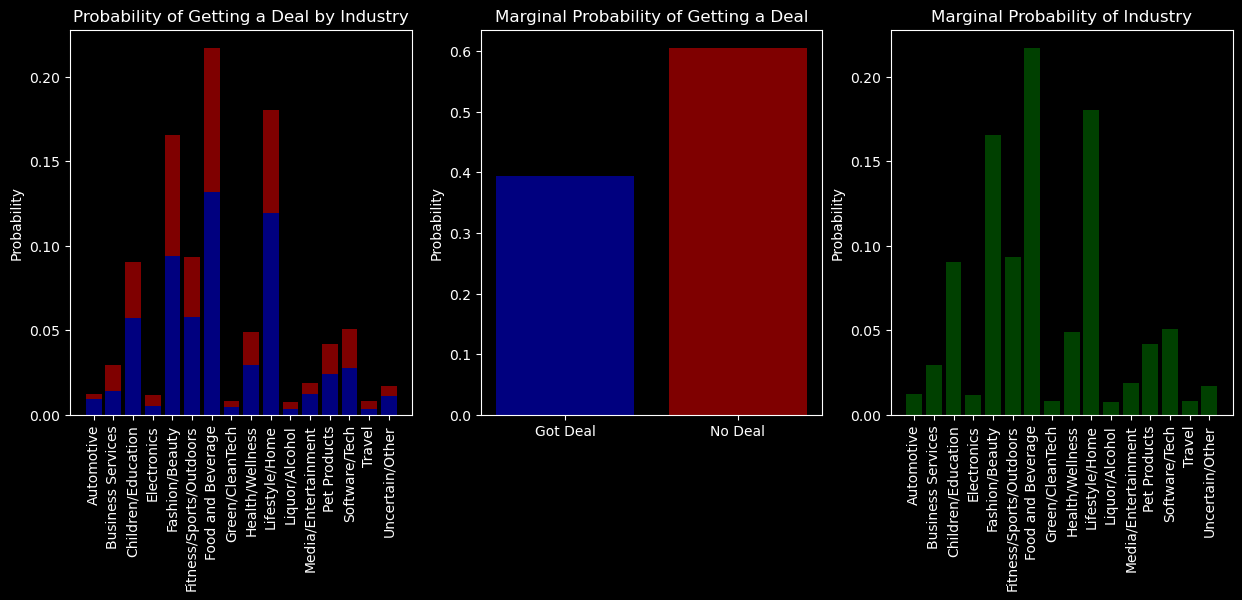

In [78]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

axs[0].bar(joint_prob.index, joint_prob[True], label='Got Deal', color='blue', alpha=0.5)
axs[0].bar(joint_prob.index, joint_prob[False], bottom=joint_prob[True], label='No Deal', color='red', alpha=0.5)
axs[0].set_xticklabels(joint_prob.index, rotation=90)
axs[0].set_ylabel('Probability')
axs[0].set_title('Probability of Getting a Deal by Industry')

# Marginal probability of getting a deal
marginal_prob_deal = joint_prob.sum(axis=0)
axs[1].bar(marginal_prob_deal.index, marginal_prob_deal, color=['blue', 'red'], alpha=0.5)
axs[1].set_xticks([0, 1])
axs[1].set_xticklabels(['Got Deal', 'No Deal'])
axs[1].set_ylabel('Probability')
axs[1].set_title('Marginal Probability of Getting a Deal')

# Marginal probability of industry
marginal_prob_industry = joint_prob.sum(axis=1)
axs[2].bar(joint_prob.index, marginal_prob_industry, color='green', alpha=0.5)
axs[2].set_xticklabels(joint_prob.index, rotation=90)
axs[2].set_ylabel('Probability')
axs[2].set_title('Marginal Probability of Industry')

As we look at new concepts in probability, it is important to stay mindful of i) what the probability sums to ii) what are the dimensions of the table that represents the probability.

You can see from the cell below that the dimensions of marginal probability table is the length of the range of the variable.

You can see from the code below that both the computed marginal probabilities in add up to 1. 

## Independent Random Variables

Random variables can be either independent or dependent. If two random variables are independent, then the value of one random variable does not affect the value of the other random variable. 

For example, if we are rolling two dice, we can use two random variables to represent the numbers that we roll. The two random variables are independent because the value of one die does not affect the value of the other die. If two random variables are dependent, then the value of one random variable does affect the value of the other random variable. For example, if we are measuring the temperature and the humidity, we can use two random variables to represent the temperature and the humidity. The two random variables are dependent because the temperature affects the humidity and the humidity affects the temperature.

More formally, **two random variables $X$ and $Y$ are independent if and only if $P(X, Y) = P(X) \cdot P(Y)$**.

In [79]:
# Test for independence of Industry and Got Deal

prob_deal     = joint_prob.sum(axis=0)
prob_industry = joint_prob.sum(axis=1)

prob_deal

Got Deal
False    0.394872
True     0.605128
dtype: float64

In [97]:
joint_prob = pd.crosstab(data['Industry'], data['Got Deal'], normalize=True)

In [98]:
joint_prob['False2'] = joint_prob.apply(lambda x: (prob_deal[False] * prob_industry[x.name]), axis=1)
joint_prob['True2'] = joint_prob.apply(lambda x: (prob_deal[True] * prob_industry[x.name]), axis=1)

joint_prob

Got Deal,False,True,False2,True2
Industry,,,,
Automotive,0.002930,0.009524,0.004918,0.007536
Business Services,0.015385,0.013919,0.011571,0.017733
Children/Education,0.032967,0.057143,0.035582,0.054528
Electronics,0.006593,0.005128,0.004629,0.007093
Fashion/Beauty,0.071795,0.093773,0.065378,0.100190
Fitness/Sports/Outdoors,0.035165,0.057875,0.036739,0.056301
Food and Beverage,0.084982,0.131868,0.085628,0.131222
Green/CleanTech,0.003663,0.004396,0.003182,0.004876
Health/Wellness,0.019780,0.029304,0.019382,0.029702


In [100]:
joint_prob = joint_prob.round(2)
joint_prob

Got Deal,False,True,False2,True2
Industry,,,,
Automotive,0.00,0.01,0.00,0.01
Business Services,0.02,0.01,0.01,0.02
Children/Education,0.03,0.06,0.04,0.05
Electronics,0.01,0.01,0.00,0.01
Fashion/Beauty,0.07,0.09,0.07,0.10
Fitness/Sports/Outdoors,0.04,0.06,0.04,0.06
Food and Beverage,0.08,0.13,0.09,0.13
Green/CleanTech,0.00,0.00,0.00,0.00
Health/Wellness,0.02,0.03,0.02,0.03


In [101]:
joint_prob[False] == joint_prob['False2']

Industry
Automotive                  True
Business Services          False
Children/Education         False
Electronics                False
Fashion/Beauty              True
Fitness/Sports/Outdoors     True
Food and Beverage          False
Green/CleanTech             True
Health/Wellness             True
Lifestyle/Home             False
Liquor/Alcohol              True
Media/Entertainment         True
Pet Products                True
Software/Tech               True
Travel                      True
Uncertain/Other             True
dtype: bool

In [102]:
joint_prob[True] == joint_prob['True2']

Industry
Automotive                  True
Business Services          False
Children/Education         False
Electronics                 True
Fashion/Beauty             False
Fitness/Sports/Outdoors     True
Food and Beverage           True
Green/CleanTech             True
Health/Wellness             True
Lifestyle/Home             False
Liquor/Alcohol              True
Media/Entertainment         True
Pet Products               False
Software/Tech               True
Travel                      True
Uncertain/Other             True
dtype: bool